In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [4]:
# drop id -- irrelevant feature
df = df.drop('id',axis=1)

KeyError: "['id'] not found in axis"

In [5]:
# parse date object: str -> date
from datetime import datetime

for i in range(21613):
  datetime_object = datetime.strptime(df.date[i], '%Y%m%dT000000')
  df.date[i] = datetime_object

df

C:\Users\mehraa\AppData\Local\Temp/ipykernel_2600/3978131604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[i] = datetime_object


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21 00:00:00,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23 00:00:00,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23 00:00:00,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16 00:00:00,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.shape

(21613, 20)

In [8]:
## method ref: https://www.kaggle.com/code/scratchpad/notebook91f4588400
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

C:\Users\mehraa\AppData\Local\Temp/ipykernel_2600/3772161388.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


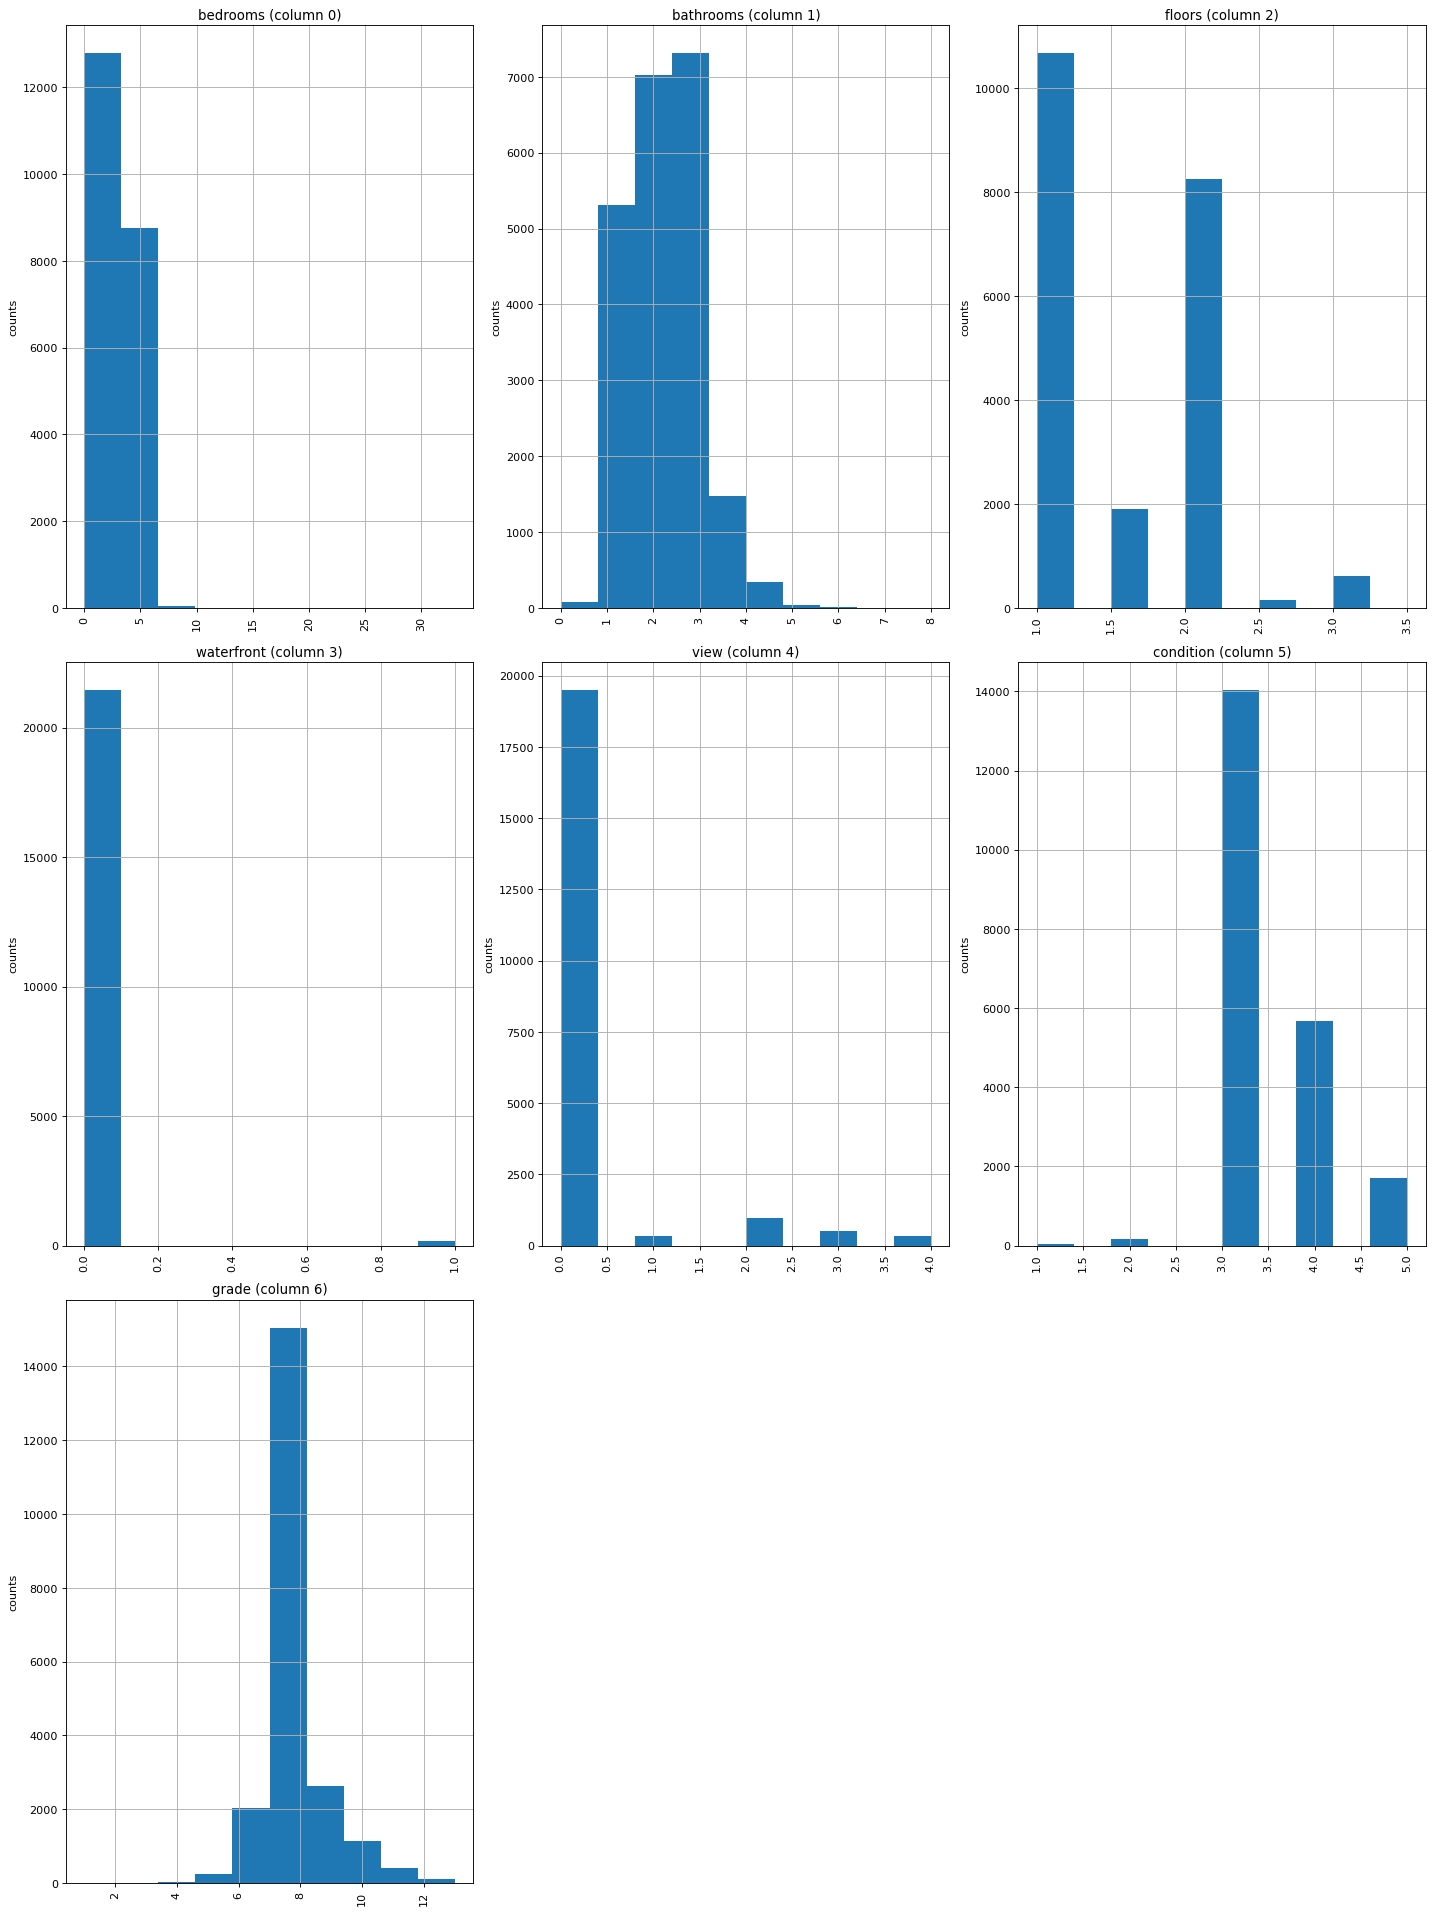

In [9]:
plotPerColumnDistribution(df,20,3)

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for the dataframe', fontsize=15)
    plt.show()

C:\Users\mehraa\AppData\Local\Temp/ipykernel_2600/1774403282.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


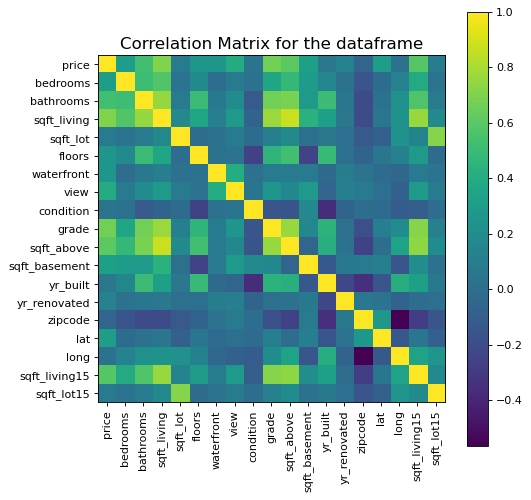

In [11]:
plotCorrelationMatrix(df, 7)

In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\mehraa\AppData\Local\Temp/ipykernel_2600/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


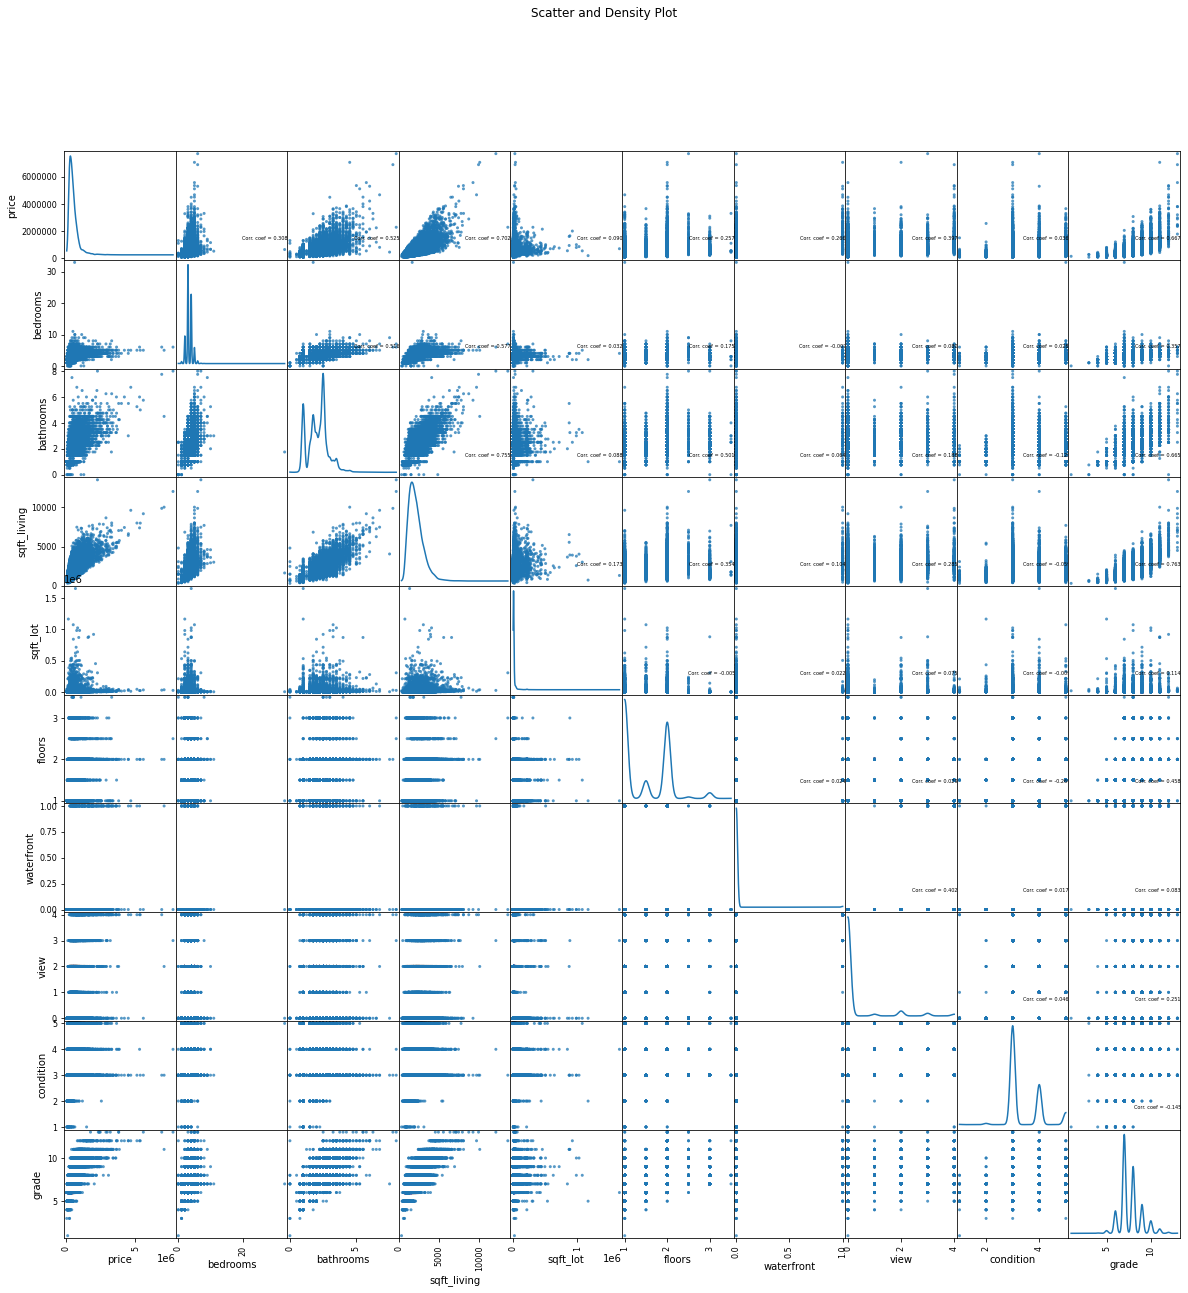

In [13]:
plotScatterMatrix(df, 20, 5)

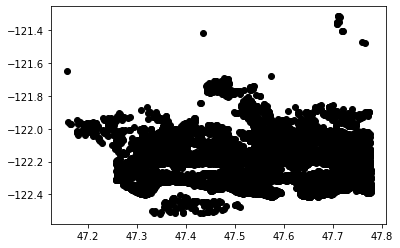

In [14]:
plt.plot(df.lat, df.long, 'o', color='black');

In [15]:
(df_train,df_test) = train_test_split(df,train_size = 0.8, test_size = 0.2, random_state = 0,shuffle = True)

In [16]:
X_train = df_train.iloc[:,2:]
X_test = df_test.iloc[:,2:]
y_train = df_train.iloc[:,1]
y_test = df_test.iloc[:,1]
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5268,3,1.00,1570,5510,1.0,0,0,4,7,1070,500,1940,0,98115,47.6942,-122.319,1770,6380
16909,3,2.50,1780,11000,1.0,0,0,4,8,1210,570,1980,0,98006,47.5574,-122.149,2310,9700
16123,3,1.50,1090,9862,1.0,0,0,3,8,1090,0,1987,0,98074,47.6256,-122.036,1710,9862
12181,4,2.50,2210,7079,2.0,0,0,3,8,2210,0,1993,0,98031,47.4206,-122.183,1970,7000
12617,3,2.50,1800,4763,2.0,0,0,3,7,1240,560,1985,0,98119,47.6460,-122.362,1790,4763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,5,5.00,3960,94089,2.0,0,0,3,10,3960,0,1998,0,98038,47.3800,-122.011,2240,64468
19648,2,2.50,1400,1262,2.0,0,0,3,8,1160,240,2008,0,98106,47.5342,-122.349,1060,1524
9845,3,2.25,2360,14950,1.0,0,0,4,9,2360,0,1978,0,98042,47.3856,-122.158,2720,14388
10799,4,2.00,2370,76665,2.0,0,0,4,8,2370,0,1978,0,98001,47.2831,-122.279,2110,19334


In [17]:
X = df_train.drop(['price','date'],axis=1)
y = df_train.price

In [18]:
#SimpleBias Regressor for Baseline
def MAE(y,yh):
    return np.abs(y-yh).mean()

def MSE(y,yh):
    return np.abs((y-yh)**2).mean()
    
y.value_counts() 
ys = ((y - y.mean())/y.std()).round(3)
ys

5268    -0.129
16909    0.247
16123   -0.430
12181   -0.430
12617    0.341
         ...  
13123    1.710
19648   -0.654
9845    -0.300
10799   -0.354
2732     0.421
Name: price, Length: 17290, dtype: float64

In [19]:
def SimpleBiasRegressor(b,n):
    yh = b*np.ones(n)
    return yh

In [20]:
b = (np.mean(ys.round(3)))
yh = SimpleBiasRegressor(b,len(ys))
MSE(ys,yh)

0.9999610059475873

In [21]:
from sklearn.metrics import r2_score
B = np.linspace(ys.min(),ys.max(),10001)
mae = []
mse = []
R2 = []
Error = []
for b in B:
    yh = SimpleBiasRegressor(b,len(ys))
    mae.append(MAE(ys,yh))
    mse.append(MSE(ys,yh))
    R2.append(r2_score(ys,yh))
    Error.append(1-r2_score(ys,yh))

<AxesSubplot:xlabel='b'>

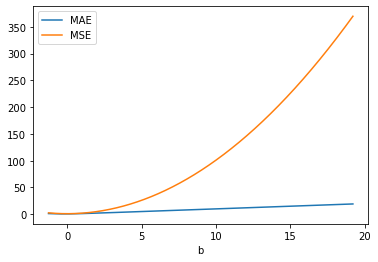

In [78]:
results = pd.DataFrame()
results['b'] = B
results['MAE'] = mae
results['MSE'] = mse
results['R2'] = R2
results['Error'] = Error
plot1 = results.plot.line(x = 'b', y = 'MAE')
results.plot.line(x='b', y='MSE', ax = plot1)

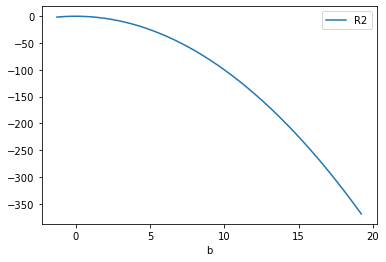

In [23]:
plot2 = results.plot.line(x = 'b', y = 'R2')

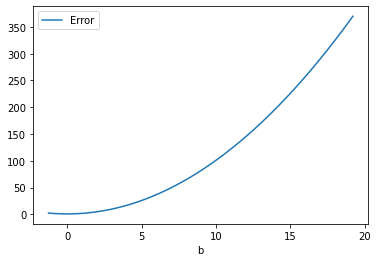

In [24]:
plot3 = results.plot.line(x = 'b', y = 'Error')

In [25]:
results

,b,MAE,MSE,R2,Error
0,-1.255000,1.254992,2.574965,-1.575066,2.575066
1,-1.252954,1.252946,2.569834,-1.569934,2.569934
2,-1.250908,1.250900,2.564711,-1.564811,2.564811
3,-1.248862,1.248854,2.559597,-1.559697,2.559697
4,-1.246816,1.246809,2.554491,-1.554590,2.554590
...,...,...,...,...,...
9996,19.196816,19.196825,369.518021,-368.532430,369.532430
9997,19.198862,19.198871,369.596578,-368.610991,369.610991
9998,19.200908,19.200917,369.675144,-368.689560,369.689560
9999,19.202954,19.202962,369.753719,-368.768138,369.768138


In [26]:
# decision tree - baseline regressor
grid = {'max_depth': np.arange(1,10)}

tree0 = DecisionTreeRegressor(max_depth=5)

In [27]:
tree0.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [28]:
# Baseline error rate - before outlier removal
print('Baseline train error rate 1-old: ', 1-tree0.score(X,y))

Baseline train error rate 1-old:  0.24155811954203954


In [29]:
# Baseline error rate - before outlier removal
print('Baseline test error rate 1-old: ', 1-tree0.score(X_test,y_test))

Baseline test error rate 1-old:  0.31195225663944637


In [29]:
# simple linear regressor - baseline regressor

In [30]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [31]:
# Baseline error rate
print('Baseline train error rate 2-old: ', 1-lr.score(X,y))

Baseline train error rate 2-old:  0.2994633309459095


In [32]:
# Baseline error rate
print('Baseline test error rate 2-old: ', 1-lr.score(X_test,y_test))

Baseline test error rate 2-old:  0.30504632844533586


In [33]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [34]:
dot_data = export_graphviz(tree0,out_file=None,feature_names=X.columns,class_names=['pos','neg'],
                                proportion=True,impurity=False,filled=True, rounded=True)

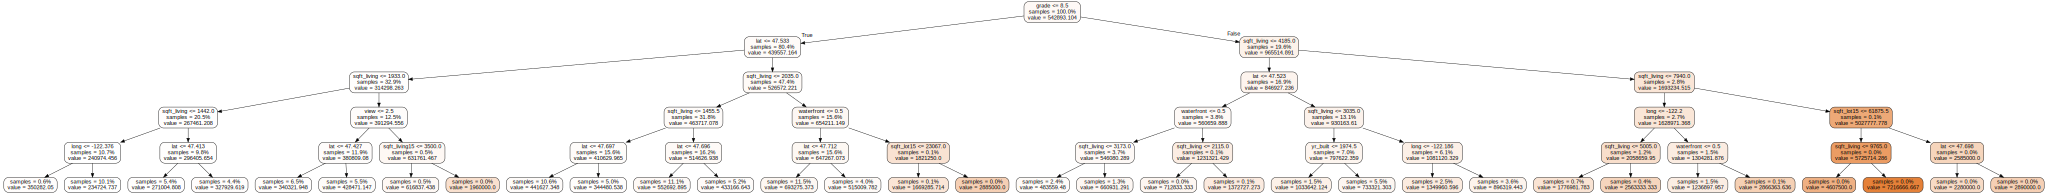

In [35]:
graph = graphviz.Source(dot_data)
graph

In [36]:
# Working FE with specific features only 
poly=PolynomialFeatures(2,interaction_only=True,include_bias=False)
Xe_train = poly.fit_transform(X_train)
Xe_test = poly.fit_transform(X_test)
cols = poly.get_feature_names(X_train.columns)
Xe_train = pd.DataFrame(Xe_train,columns=cols)
Xe_test = pd.DataFrame(Xe_test,columns=cols)
Xe_train


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat long,lat sqft_living15,lat sqft_lot15,long sqft_living15,long sqft_lot15,sqft_living15 sqft_lot15
0,3.0,1.00,1570.0,5510.0,1.0,0.0,0.0,4.0,7.0,1070.0,...,4.679516e+06,-1.200133e+07,173663550.0,6.259737e+08,-5833.906850,84418.734,3.042890e+05,-216504.63,-780395.220,11292600.0
1,3.0,2.50,1780.0,11000.0,1.0,0.0,0.0,4.0,8.0,1210.0,...,4.660911e+06,-1.197133e+07,226393860.0,9.506582e+08,-5809.088853,109857.594,4.613068e+05,-282164.19,-1184845.300,22407000.0
2,3.0,1.50,1090.0,9862.0,1.0,0.0,0.0,3.0,8.0,1090.0,...,4.670833e+06,-1.196856e+07,167706540.0,9.672058e+08,-5812.037722,81439.776,4.696837e+05,-208681.56,-1203519.032,16864020.0
3,4.0,2.50,2210.0,7079.0,2.0,0.0,0.0,3.0,8.0,2210.0,...,4.648689e+06,-1.197772e+07,193121070.0,6.862170e+08,-5793.991170,93418.582,3.319442e+05,-240700.51,-855281.000,13790000.0
4,3.0,2.50,1800.0,4763.0,2.0,0.0,0.0,3.0,7.0,1240.0,...,4.674978e+06,-1.200604e+07,175633010.0,4.673408e+08,-5830.059852,85286.340,2.269379e+05,-219027.98,-582810.206,8525770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5.0,5.00,3960.0,94089.0,2.0,0.0,0.0,3.0,10.0,3960.0,...,4.645040e+06,-1.196171e+07,219605120.0,6.320314e+09,-5780.881180,106131.200,3.054494e+06,-273304.64,-7865805.148,144408320.0
17286,2.0,2.50,1400.0,1262.0,2.0,0.0,0.0,3.0,8.0,1160.0,...,4.663390e+06,-1.200317e+07,103992360.0,1.495135e+08,-5815.761836,50386.252,7.244212e+04,-129689.94,-186459.876,1615440.0
17287,3.0,2.25,2360.0,14950.0,1.0,0.0,0.0,4.0,9.0,2360.0,...,4.645779e+06,-1.197661e+07,266674240.0,1.410628e+09,-5788.530125,128888.832,6.817840e+05,-332269.76,-1757609.304,39135360.0
17288,4.0,2.00,2370.0,76665.0,2.0,0.0,0.0,4.0,8.0,2370.0,...,4.633791e+06,-1.198346e+07,206782110.0,1.894751e+09,-5781.730185,99767.341,9.141715e+05,-258008.69,-2364142.186,40794740.0


In [37]:
Xe_train.shape


(17290, 171)

In [61]:
# Random Forests Regressor 
grid = {'n_estimators':np.arange(90,110,10)}

rf = RandomForestRegressor(n_estimators = 90)
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)

In [62]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=90)

In [39]:

rfCV.fit(Xe_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': array([ 90, 100])},
             return_train_score=True)

In [40]:
print('best number of trees',rfCV.best_params_)

best number of trees {'n_estimators': 90}


In [41]:
print('validation R2', rfCV.best_score_)

validation R2 0.8510698154211969


In [42]:
results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['Train R2'] = rfCV.cv_results_['mean_train_score']
results['Valid R2'] = rfCV.cv_results_['mean_test_score']
results

,trees,Train R2,Valid R2
0,90,0.980374,0.851070
1,100,0.980224,0.850549


<AxesSubplot:xlabel='trees'>

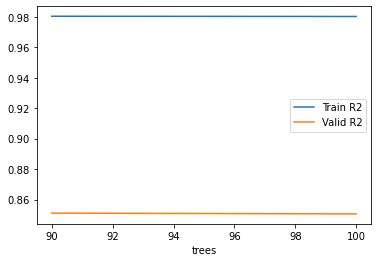

In [43]:
plot1 = results.plot.line(x='trees',y='Train R2')
results.plot.line(x='trees',y='Valid R2',ax=plot1)

In [63]:
feature_importance = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_importance.sort_values(ascending=False)

sqft_living      0.308999
grade            0.272964
lat              0.160412
long             0.069479
waterfront       0.032518
sqft_living15    0.032508
yr_built         0.026301
sqft_above       0.021691
sqft_lot         0.013964
zipcode          0.013894
sqft_lot15       0.012566
view             0.012294
bathrooms        0.006950
sqft_basement    0.005378
condition        0.003279
bedrooms         0.002776
yr_renovated     0.002137
floors           0.001888
dtype: float64

<AxesSubplot:>

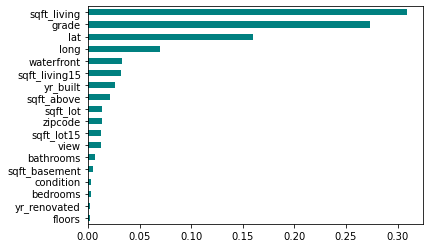

In [64]:
feature_importance.sort_values().plot.barh(color='teal')

In [75]:
#rf.fit(Xe_train,y_train)
feature_importance = pd.Series(rf.feature_importances_,index=Xe_train.columns).head(20)
feature_importance.sort_values(ascending=False)

long                    0.026764
lat                     0.024205
zipcode                 0.004277
bedrooms sqft_living    0.002509
yr_built                0.001859
sqft_living             0.001515
bedrooms bathrooms      0.000838
sqft_living15           0.000686
sqft_above              0.000584
sqft_lot                0.000366
sqft_lot15              0.000347
bathrooms               0.000224
waterfront              0.000183
sqft_basement           0.000144
yr_renovated            0.000117
view                    0.000087
bedrooms                0.000068
floors                  0.000065
grade                   0.000052
condition               0.000031
dtype: float64

<AxesSubplot:>

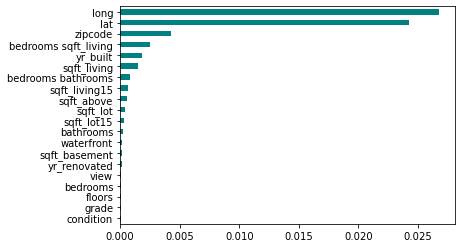

In [76]:
feature_importance.sort_values().plot.barh(color='teal')

In [44]:
#ridge and Lasso 
grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge = Ridge()
ridgeCV = GridSearchCV(ridge,param_grid=grid,return_train_score=True)
ridgeCV.fit(Xe_train,y_train)

C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.38272e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48557e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.81439e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34576e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.21844e-20): result may not be acc

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             return_train_score=True)

In [45]:
ridgeCV.best_params_

{'alpha': 0.0001}

In [46]:
results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['Train R2'] = ridgeCV.cv_results_['mean_train_score']
results['Valid R2'] = ridgeCV.cv_results_['mean_test_score']
results

,alpha,Train R2,Valid R2
0,-4.0,0.820365,0.792822
1,-3.0,0.819382,0.791818
2,-2.0,0.818417,0.790855
3,-1.0,0.818171,0.790590
4,0.0,0.817681,0.789873
5,1.0,0.815797,0.788360
6,2.0,0.813468,0.787658
7,3.0,0.810274,0.785776
8,4.0,0.807210,0.783659
9,5.0,0.805808,0.782641


<AxesSubplot:xlabel='alpha'>

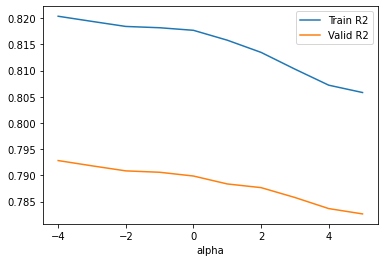

In [47]:
plot1 = results.plot.line(x='alpha',y='Train R2')
results.plot.line(x='alpha',y='Valid R2',ax=plot1)

In [48]:
coef = pd.Series(ridgeCV.best_estimator_.coef_,index=Xe_train.columns)
coef.sort_values()

floors              -5.760074e+07
bathrooms           -2.321931e+07
grade               -1.823316e+07
lat long            -1.146352e+06
sqft_living grade   -4.927433e+05
                         ...     
condition            7.424945e+06
bedrooms             1.496426e+07
long                 2.034515e+07
waterfront           3.529478e+07
lat                  5.444456e+07
Length: 171, dtype: float64

In [80]:
grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
lasso = Lasso()
lassoCV = GridSearchCV(lasso,param_grid=grid,return_train_score=True)
lassoCV.fit(Xe_train,y_train)

C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197257067642261.94, tolerance: 178133856304.13672
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201622987418079.16, tolerance: 200601636410.698
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199343284740662.03, tolerance: 186824072267.357
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208596541926436.06, tolerance: 196874322898.4431
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205857541615784.44, tolerance: 198017456688.53616
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198239048209639.4, tolerance: 178133856304.13672
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             return_train_score=True)

In [81]:
lassoCV.best_params_

{'alpha': 1000}

In [82]:
results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['Train R2'] = lassoCV.cv_results_['mean_train_score']
results['Valid R2'] = lassoCV.cv_results_['mean_test_score']
results

,alpha,Train R2,Valid R2
0,-4.0,0.788907,0.760441
1,-3.0,0.788907,0.760442
2,-2.0,0.788907,0.760442
3,-1.0,0.788908,0.760449
4,0.0,0.788912,0.760519
5,1.0,0.788907,0.760812
6,2.0,0.788749,0.762560
7,3.0,0.787506,0.762664
8,4.0,0.786551,0.762615
9,5.0,0.786106,0.762330


<AxesSubplot:xlabel='alpha'>

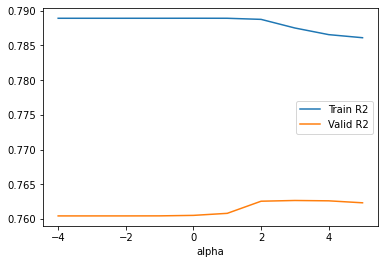

In [83]:
plot1 = results.plot.line(x='alpha',y='Train R2')
results.plot.line(x='alpha',y='Valid R2',ax=plot1)

In [84]:
coef = pd.Series(lassoCV.best_estimator_.coef_,index=Xe_train.columns)
coef.sort_values()

bathrooms condition    -6836.800599
bedrooms bathrooms     -5871.279162
zipcode                 -970.254022
condition yr_built      -134.502176
grade yr_built           -54.476860
                           ...     
grade lat                794.562949
view grade              1159.362224
bedrooms floors         2018.810619
bathrooms view          5706.576687
bathrooms grade        12152.539674
Length: 171, dtype: float64

In [54]:
grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
lasso = Lasso()
lassoCV = GridSearchCV(lasso,param_grid=grid,return_train_score=True)
lassoCV.fit(X_train,y_train)

C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239264714686871.88, tolerance: 178133856304.13672
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269525572579139.72, tolerance: 200601636410.698
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255611283083629.34, tolerance: 186824072267.357
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272675239829138.7, tolerance: 196874322898.4431
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272969554106826.78, tolerance: 198017456688.53616
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241484253195656.1, tolerance: 178133856304.13672
  model = cd_fast.enet_coordinate_descent(
C:\Users\mehraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             return_train_score=True)

In [55]:
lassoCV.best_params_

{'alpha': 10}

In [56]:
results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['Train R2'] = lassoCV.cv_results_['mean_train_score']
results['Valid R2'] = lassoCV.cv_results_['mean_test_score']
results

,alpha,Train R2,Valid R2
0,-4.0,0.701084,0.696174
1,-3.0,0.701084,0.696174
2,-2.0,0.701084,0.696174
3,-1.0,0.701084,0.696174
4,0.0,0.701084,0.696174
5,1.0,0.701084,0.696176
6,2.0,0.701063,0.696172
7,3.0,0.698938,0.694166
8,4.0,0.629599,0.623981
9,5.0,0.547221,0.540568


In [58]:
coef = pd.Series(lassoCV.best_estimator_.coef_,index=X_train.columns)
coef.sort_values()

long            -221713.969530
bedrooms         -34690.448809
yr_built          -2610.550672
zipcode            -566.181057
sqft_basement      -135.610792
sqft_above         -102.658559
sqft_lot15           -0.467977
sqft_lot              0.175375
yr_renovated         20.128781
sqft_living15        24.211726
sqft_living         288.167312
floors             7414.373009
condition         26161.181627
bathrooms         39420.941851
view              52852.008996
grade             93710.088516
lat              604305.480674
waterfront       604347.088538
dtype: float64

<AxesSubplot:>

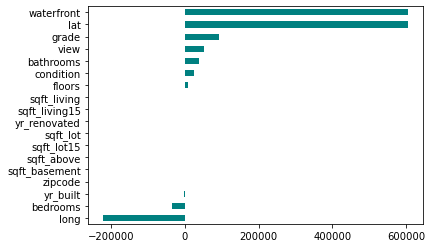

In [59]:
coef.sort_values().plot.barh(color='teal')

In [123]:
def Prediction(loc,model):
    call = Xe_test.loc[loc].to_numpy().reshape(1,-1)
    value = pd.DataFrame(call)
    target = y_test.iloc[loc]
    result = model.predict(value)
    print("Predicted Price", result )
    print("Actual Price", target)

In [125]:
Prediction(45,rf)

Predicted Price [760508.53333333]
Actual Price 687000.0
